# 5. Access satellite imagery using Python

## Search a STAC catalog

In [2]:
from pystac_client import Client
from shapely.geometry import Point

api_url = "https://earth-search.aws.element84.com/v1" # Earth Search in the SpatioTemporal Asset Catalog

client = Client.open(api_url)

collection = "sentinel-2-l2a" # a Cloud Optimized GeoTIFF Raster

point = Point(4.89, 52.37) # AMS coordinates

search = client.search(
    collections = [collection],
    intersects = point,
    max_items = 10)

print(search.matched())

1178


In [3]:
items = search.item_collection()

print(len(items))

10


In [4]:
for item in items:
    print(item)

<Item id=S2B_31UFU_20240305_0_L2A>
<Item id=S2B_31UFU_20240302_0_L2A>
<Item id=S2A_31UFU_20240229_0_L2A>
<Item id=S2A_31UFU_20240226_0_L2A>
<Item id=S2B_31UFU_20240224_0_L2A>
<Item id=S2B_31UFU_20240221_0_L2A>
<Item id=S2A_31UFU_20240219_0_L2A>
<Item id=S2A_31UFU_20240216_0_L2A>
<Item id=S2B_31UFU_20240214_0_L2A>
<Item id=S2B_31UFU_20240211_0_L2A>


In [5]:
item = items[0]

print(item.datetime, "\n\n", item.geometry, "\n\n", item.properties)

2024-03-05 10:56:18.414000+00:00 

 {'type': 'Polygon', 'coordinates': [[[4.498475093400055, 53.240199174677954], [4.464995307918359, 52.25346561204129], [6.071664488869862, 52.22257539160585], [6.141754296879459, 53.20819279121764], [4.498475093400055, 53.240199174677954]]]} 

 {'created': '2024-03-05T16:00:58.819Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 99.987018, 'proj:epsg': 32631, 'mgrs:utm_zone': 31, 'mgrs:latitude_band': 'U', 'mgrs:grid_square': 'FU', 'grid:code': 'MGRS-31UFU', 'view:sun_azimuth': 164.425066692819, 'view:sun_elevation': 30.389954202583198, 's2:degraded_msi_data_percentage': 0.0019, 's2:nodata_pixel_percentage': 0, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0, 's2:cloud_shadow_percentage': 0.008351, 's2:vegetation_percentage': 0, 's2:not_vegetated_percentage': 0.000262, 's2:water_percentage': 0.004366, 's2:unclassified_percentage': 0, 's2:medium_proba_clouds_percentage

POINT (4.89 52.37)


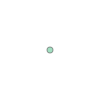

In [6]:
print(point)
point

## Exercise: Search satellite scenes using metadata filters



Search for all the available Sentinel-2 scenes in the sentinel-2-l2a collection that satisfy the following criteria: - intersect a provided bounding box (use ±0.01 deg in lat/lon from the previously defined point); - have been recorded between 20 March 2020 and 30 March 2020; - have a cloud coverage smaller than 10% (hint: use the query input argument of client.search).

How many scenes are available? Save the search results in GeoJSON format.

In [7]:
bounding_box = point.buffer(0.01).bounds
bounding_box

(4.88, 52.36, 4.8999999999999995, 52.379999999999995)

TAB, SHIFT+TAB to find client.search() documentation

Find arguments to the query parameter of client.search() in the _API documentation_

https://earth-search.aws.element84.com/v1/api.html#tag/Features/operation/getFeatures

In [8]:
search = client.search(
    collections = [collection],
    bbox = bounding_box,
    datetime = ['2020-03-20', '2020-03-30'],
    query = ["eo:cloud_cover<15"]
)
print(search.matched())

6


In [9]:
items = search.item_collection()
items.save_object("../data/search.json")

## Access the assets

In [10]:
items[0]

<Item id=S2A_31UFU_20200328_1_L2A>

In [11]:
assets = items[0].assets
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [12]:
print(assets["aot"].title)

Aerosol optical thickness (AOT)


In [13]:
# use tuple to inspect json 
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

aot: Aerosol optical thickness (AOT)
blue: Blue (band 2) - 10m
coastal: Coastal aerosol (band 1) - 60m
granule_metadata: None
green: Green (band 3) - 10m
nir: NIR 1 (band 8) - 10m
nir08: NIR 2 (band 8A) - 20m
nir09: NIR 3 (band 9) - 60m
red: Red (band 4) - 10m
rededge1: Red edge 1 (band 5) - 20m
rededge2: Red edge 2 (band 6) - 20m
rededge3: Red edge 3 (band 7) - 20m
scl: Scene classification map (SCL)
swir16: SWIR 1 (band 11) - 20m
swir22: SWIR 2 (band 12) - 20m
thumbnail: Thumbnail image
tileinfo_metadata: None
visual: True color image
wvp: Water vapour (WVP)
aot-jp2: Aerosol optical thickness (AOT)
blue-jp2: Blue (band 2) - 10m
coastal-jp2: Coastal aerosol (band 1) - 60m
green-jp2: Green (band 3) - 10m
nir-jp2: NIR 1 (band 8) - 10m
nir08-jp2: NIR 2 (band 8A) - 20m
nir09-jp2: NIR 3 (band 9) - 60m
red-jp2: Red (band 4) - 10m
rededge1-jp2: Red edge 1 (band 5) - 20m
rededge2-jp2: Red edge 2 (band 6) - 20m
rededge3-jp2: Red edge 3 (band 7) - 20m
scl-jp2: Scene classification map (SCL)
swi

Confirming that the raster contains one data file per optical band e.g. blue green red

In [14]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg


In [15]:
!wget https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg --directory-prefix=/app/data/

--2024-03-07 12:37:46--  https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg
Resolving sentinel-cogs.s3.us-west-2.amazonaws.com (sentinel-cogs.s3.us-west-2.amazonaws.com)... ::ffff:52.92.136.202, ::ffff:52.92.129.242, ::ffff:52.92.184.58, ...
Connecting to sentinel-cogs.s3.us-west-2.amazonaws.com (sentinel-cogs.s3.us-west-2.amazonaws.com)|::ffff:52.92.136.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92428 (90K) [image/jpeg]
Saving to: ‘/app/data/thumbnail.jpg.1’

thumbnail.jpg.1     100%[===================>]  90.26K   220KB/s    in 0.4s    

2024-03-07 12:37:47 (220 KB/s) - ‘/app/data/thumbnail.jpg.1’ saved [92428/92428]



Thumbnail in markdown

![Thumbnail](https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg)

In [16]:
import rioxarray
nir_href = assets["nir"].href
nir = rioxarray.open_rasterio(nir_href)

In [17]:
print(nir)

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 88kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 88kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [18]:
nir.rio.to_raster('../data/nir.tif')
nir[0,1500:2200,1500:2200].rio.to_raster('../data/nir_subset.tif')

## Exercise: Downloading Landsat 8 Assets

In this exercise we put in practice all the skills we have learned in this episode to retrieve images from a different mission: [Landsat 8](https://www.usgs.gov/landsat-missions/landsat-8). In particular, we browse images from the [Harmonized Landsat Sentinel-2 (HLS) project](https://lpdaac.usgs.gov/products/hlsl30v002/), which provides images from NASA’s Landsat 8 and ESA’s Sentinel-2 that have been made consistent with each other. The HLS catalog is indexed in the NASA Common Metadata Repository (CMR) and it can be accessed from the STAC API endpoint at the following URL: https://cmr.earthdata.nasa.gov/stac/LPCLOUD.

 - Using pystac_client, search for all assets of the Landsat 8 collection (HLSL30.v2.0) from February to March 2021, intersecting the point with longitude/latitute coordinates (-73.97, 40.78) deg.
- Visualize an item’s thumbnail (asset key browse).

In [19]:
client = Client.open("https://cmr.earthdata.nasa.gov/stac/LPCLOUD")

search = client.search(
    collections = 'HLSL30.v2.0',
    datetime = ['2021-02','2021-03'],
    intersects = Point(-73.97, 40.78)
)

print(search.matched())

5


In [20]:
items = search.item_collection()
items[0]
items[0].assets['browse'].href

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg'

Thumbnail in markdown

![Thumbnail](https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg)

In [21]:
print(items[0].assets["browse"].href)

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg


# 6. Read and visualize raster data

### Load a Raster and view attributes

In [22]:
import pystac

items = pystac.ItemCollection.from_file("../data/geospatial-python-raster-dataset/search.json")

items[0] # Sentinel-2 scenes March 28th 2020

items[0].assets # look for nir09

# invalid data dependency -> shift to own search json
items = pystac.ItemCollection.from_file("../data/search.json")

items[0].assets # BINGO!

{'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/AOT.tif>,
 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B02.tif>,
 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B01.tif>,
 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/granule_metadata.xml>,
 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B03.tif>,
 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B08.tif>,
 'nir08': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1

In [23]:
import rioxarray

raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href) # raster Amsterdam Band 9

raster_ams_b9 # look for central wavelength 945 nm https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/msi-instrument

# one band, 1830 rows and 1830 cols
# 3348900 pixels of type unsigned integer16


<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 7MB
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [24]:
# ALT+LEFT-CLICK-and-DRAG  https://medium.com/@shouke.wei/how-to-use-the-multiline-cursor-in-the-jupyter-notebook-fd0a21493542
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.bounds())
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

0
EPSG:32631
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


### Visualize a Raster

In [25]:
raster_ams_b9.values

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

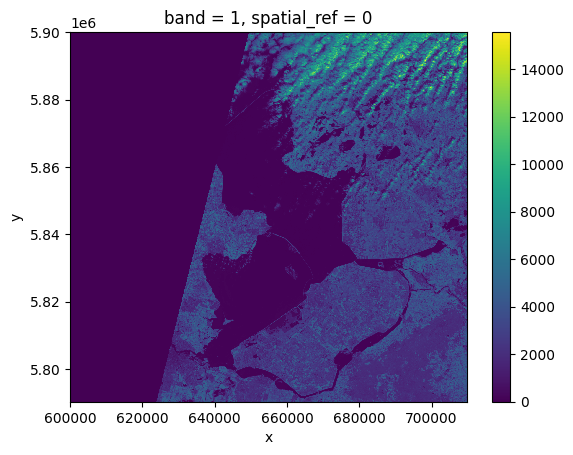

In [26]:
raster_ams_b9.plot() # easy plot of raster with coordinates

# cloudy pixels at the top have high reflectance values, telling of the fact that the wavelength 945nm is sensitive to water vapor.
# band = 1 refers to the ordering of all the bands in the DataArray.
# half the image is blank.

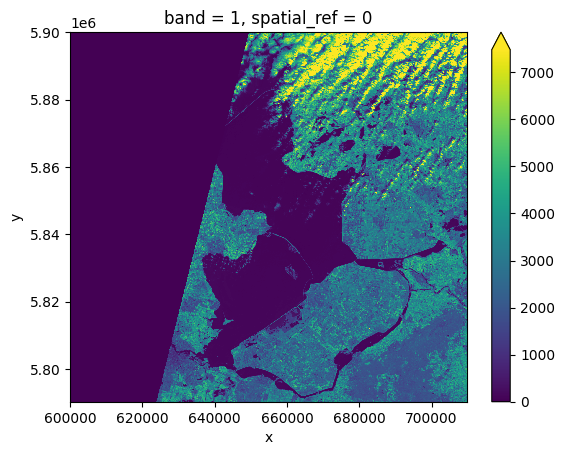

In [27]:
raster_ams_b9.plot(robust = True) # displays values betwen the 2nd and 98th percentiles.

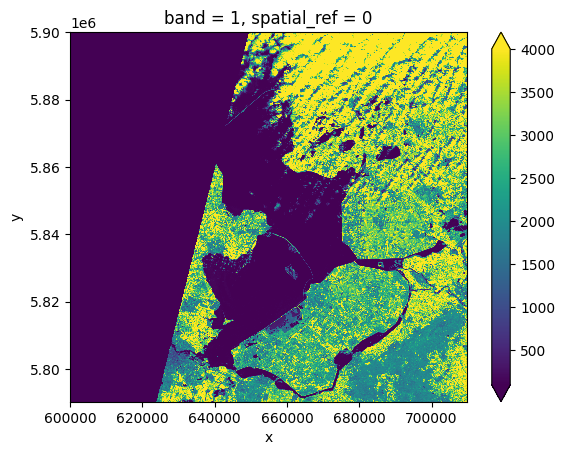

In [28]:
raster_ams_b9.plot(vmin = 100, vmax = 4000) # manuel set

### View Raster Coordinate Reference System CRS

In [29]:
print(raster_ams_b9.rio.crs.to_epsg()) # succinctly representing a particular CRS

32631


In [30]:
from pyproj import CRS

espg = raster_ams_b9.rio.crs.to_epsg()

crs = CRS(espg)

crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

#### Exercise: Find the access units of the CRS

Look for a method

In [32]:
dir(crs)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

In [33]:
help(crs)

Help on CRS in module pyproj.crs.crs object:

class CRS(builtins.object)
 |  CRS(projparams: Optional[Any] = None, **kwargs) -> None
 |  
 |  A pythonic Coordinate Reference System manager.
 |  
 |  .. versionadded:: 2.0.0
 |  
 |  See: :c:func:`proj_create`
 |  
 |  The functionality is based on other fantastic projects:
 |  
 |  * `rasterio <https://github.com/mapbox/rasterio/blob/c13f0943b95c0eaa36ff3f620bd91107aa67b381/rasterio/_crs.pyx>`_  # noqa: E501
 |  * `opendatacube <https://github.com/opendatacube/datacube-core/blob/83bae20d2a2469a6417097168fd4ede37fd2abe5/datacube/utils/geometry/_base.py>`_  # noqa: E501
 |  
 |  Attributes
 |  ----------
 |  srs: str
 |      The string form of the user input used to create the CRS.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other: Any) -> bool
 |      Return self==value.
 |  
 |  __getstate__(self) -> dict[str, str]
 |  
 |  __hash__(self) -> int
 |      Return hash(self).
 |  
 |  __init__(self, projparams: Optional[Any] = None

In [34]:
crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

__Answer__
- two axis'
- units are meters

### Understanding pyproj CRS Summary

In [36]:
# revisit the CRS summary
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Each UTM zone has 6 degrees of longitudein width.
There are 60 zones in UTM.

### Calucate raster statistics

In [44]:
print('min: \n',raster_ams_b9.min(), '\n')
print('max: \n',raster_ams_b9.max(), '\n')
print('mean: \n',raster_ams_b9.mean(), '\n')
print('std: \n',raster_ams_b9.std(), '\n')

min: 
 <xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 8B 0 

max: 
 <xarray.DataArray ()> Size: 2B
array(15558, dtype=uint16)
Coordinates:
    spatial_ref  int64 8B 0 

mean: 
 <xarray.DataArray ()> Size: 8B
array(1649.83763385)
Coordinates:
    spatial_ref  int64 8B 0 

std: 
 <xarray.DataArray ()> Size: 8B
array(2053.77598092)
Coordinates:
    spatial_ref  int64 8B 0 



In [45]:
print('25th - 75th percentiles: \n', raster_ams_b9.quantile([0.25, 0.75]), '\n')

25th - 75th percentiles: 
 <xarray.DataArray (quantile: 2)> Size: 16B
array([   0., 2919.])
Coordinates:
  * quantile  (quantile) float64 16B 0.25 0.75 



In [46]:
import numpy as np

print(np.percentile(raster_ams_b9, 25))
print(np.percentile(raster_ams_b9, 75))

0.0
2919.0


In [47]:
help(raster_ams_b9.quantile)

Help on method quantile in module xarray.core.dataarray:

quantile(q: 'ArrayLike', dim: 'Dims' = None, *, method: 'QuantileMethods' = 'linear', keep_attrs: 'bool | None' = None, skipna: 'bool | None' = None, interpolation: 'QuantileMethods | None' = None) -> 'Self' method of xarray.core.dataarray.DataArray instance
    Compute the qth quantile of the data along the specified dimension.
    
    Returns the qth quantiles(s) of the array elements.
    
    Parameters
    ----------
    q : float or array-like of float
        Quantile to compute, which must be between 0 and 1 inclusive.
    dim : str or Iterable of Hashable, optional
        Dimension(s) over which to apply quantile.
    method : str, default: "linear"
        This optional parameter specifies the interpolation method to use when the
        desired quantile lies between two data points. The options sorted by their R
        type as summarized in the H&F paper [1]_ are:
    
            1. "inverted_cdf"
            2. "

Finding 0 in the 25th percentile and the satellite photo being blank on the left-hand side indicate missing values, which is common in raster, particularly imported with `rioxarray`. A common reason for missing values is that the sensor collecting the data flew over only some part of a defined region.

We can recode them as NaN using the bolean mask stored in the object.

In [68]:
print(raster_ams_b9.rio.nodata) # recall

0


In [72]:
# masked=True
rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 13MB
[3348900 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [70]:
# where nodata
raster_ams_b9.where(raster_ams_b9!=raster_ams_b9.rio.nodata)

<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 13MB
array([[[   nan,    nan,    nan, ..., 10061., 10200., 10172.],
        [   nan,    nan,    nan, ..., 10424., 10315.,  9763.],
        [   nan,    nan,    nan, ..., 10328., 10648., 10405.],
        ...,
        [   nan,    nan,    nan, ...,  4298.,  4343.,  4315.],
        [   nan,    nan,    nan, ...,  4284.,  4284.,  4155.],
        [   nan,    nan,    nan, ...,  3935.,  3545.,  3958.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [100]:
raster_ams_b9_v2 = rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

print('setting missing to 0 :\n', raster_ams_b9.min().values.item(),'\n')

print('setting missing to NaN :\n', raster_ams_b9_v2.min().values.item(),'\n')

setting missing to 0 :
 0 

setting missing to NaN :
 1.0 

